Unbalanced Designs- with an unequal number of subjects per cell: PROC GLM
==============================================================================
MEANS: unadjusted means  
LSMEANS ... / PDIFF: least-square, adjusted means for main effect, PDIFF option - computes probabilities for all pairwise differences (series of TTEST)

In [2]:
*Unbalanced Data;
DATA agitation_level noprint;
length gender$ 20;
DO music="Piano Interlude", "Mozart", "Easy Listening";
	DO stage="Early Stage","Late Stage";
		DO i=1 TO 5;
			if i le 2 then gender="male";
			else gender="female";
			input levels @@;
			output;
		END;
	END;
END;

DATALINES;
21 24 22 18 20 
12 15 18 20 19
9 7 9 8 12 
15 8 12 13 11
29 26 30 24 26
17 19 21 18 16
;

PROC GLM DATA=agitation_level; *ANOVA dont show interaction plot;
TITLE "TWO-WAY ANOVA";
CLASS music stage;
model levels = music | stage;
CONTRAST 'Easy Listening VS Mozart' music 1 -1 0;
CONTRAST 'Easy Listening VS Piano Interlude' music 1 0 -1;
MEANS music | stage;
lsmeans music | stage/ adjust=scheffe ; *tukey , sidak , sheffe , bonferroni (bon) ;
run;


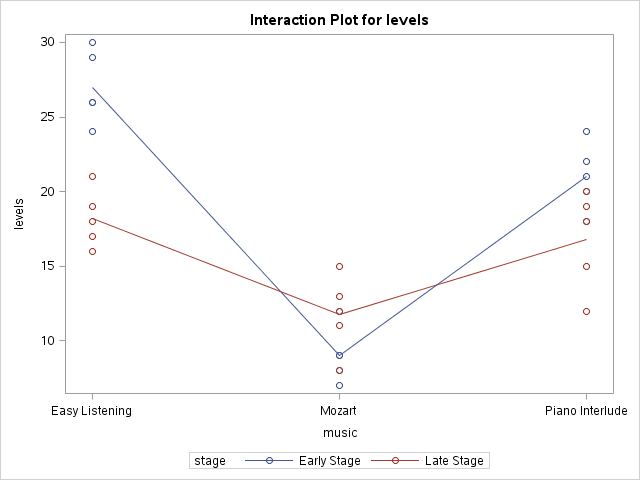
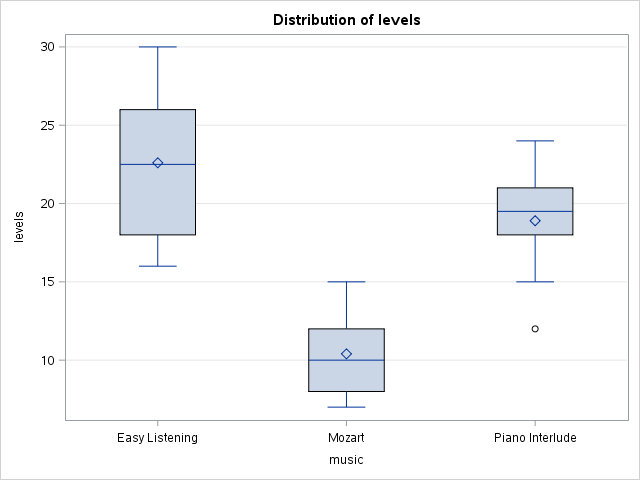
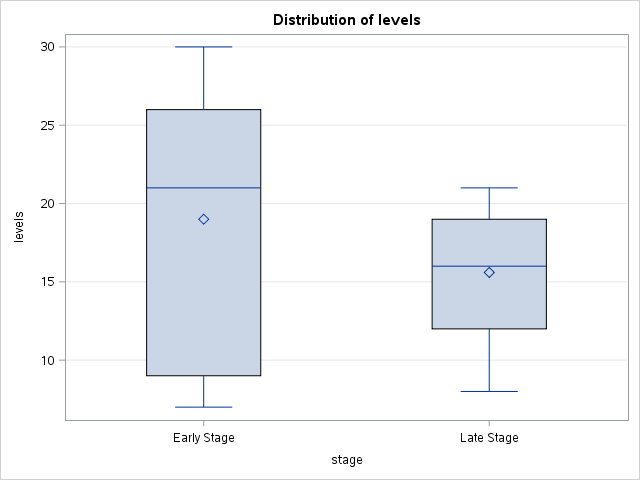
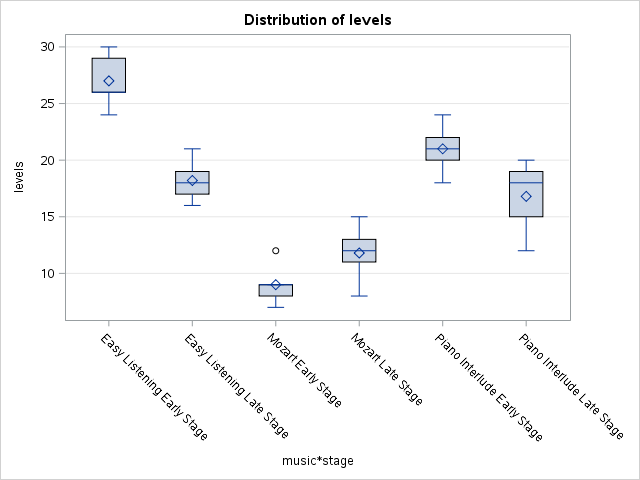
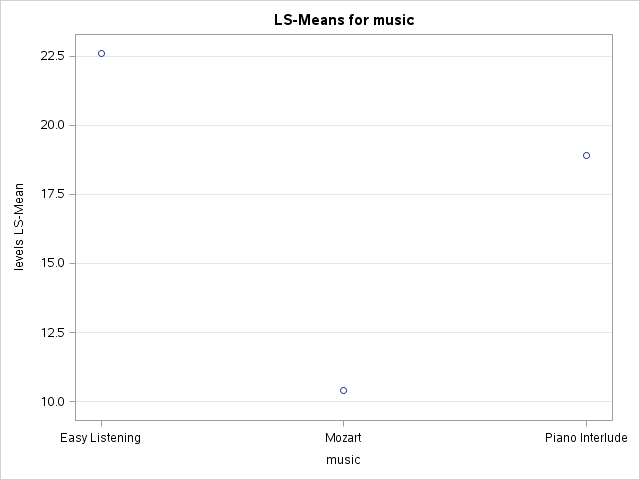
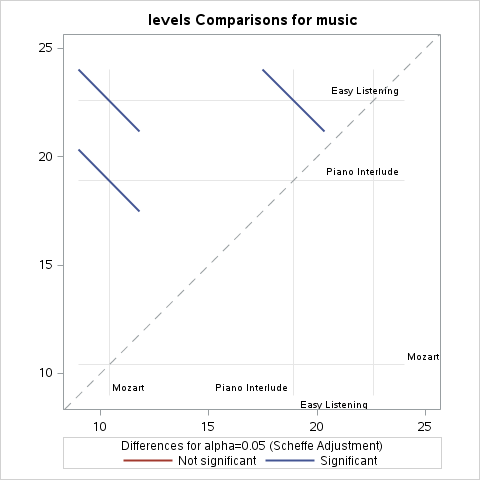
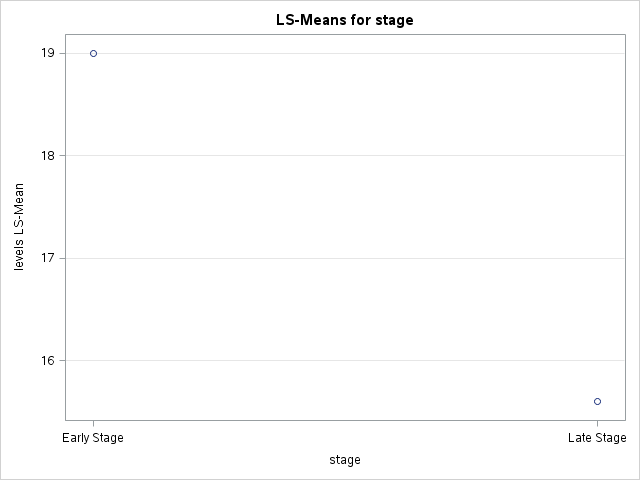
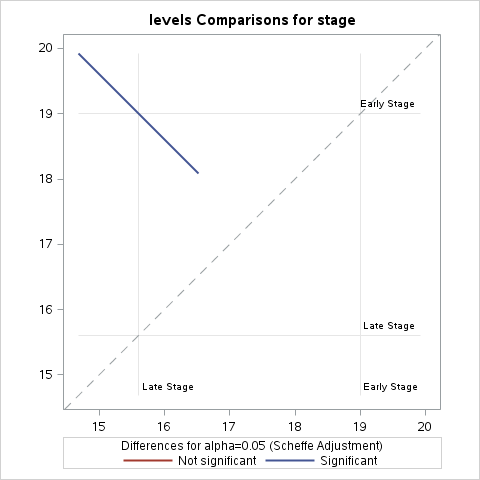
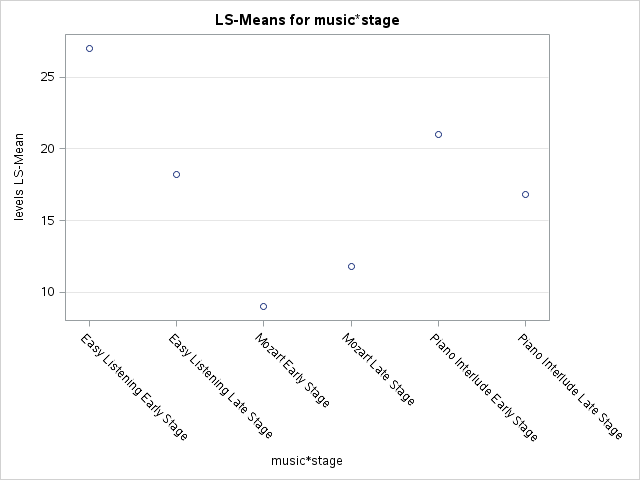
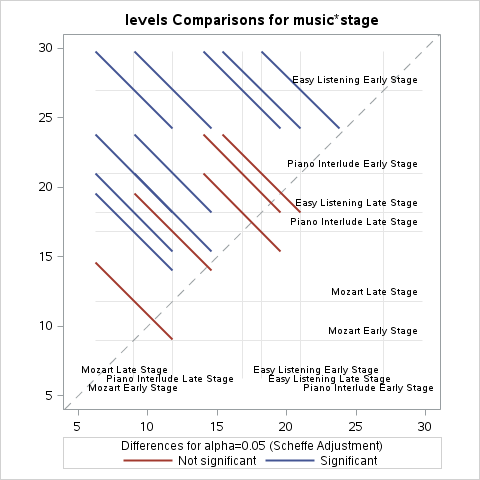

In [3]:
PROC GLM DATA=agitation_level; *ANOVA dont show interaction plot;
TITLE "TWO-WAY ANOVA";
CLASS music stage;
model levels = music | stage;
CONTRAST 'Easy Listening VS Mozart' music 1 -1 0;
CONTRAST 'Easy Listening VS Piano Interlude' music 1 0 -1;
MEANS music | stage;
lsmeans music | stage/ adjust=scheffe ; *tukey , sidak , sheffe , bonferroni (bon) ;
run;

Analysis of Covariance
===========================
Decide which group has higher math score  
Adjust for possible difference due to confounding(IQ)

We have group A, B, and we going to remove confounding effect to compare


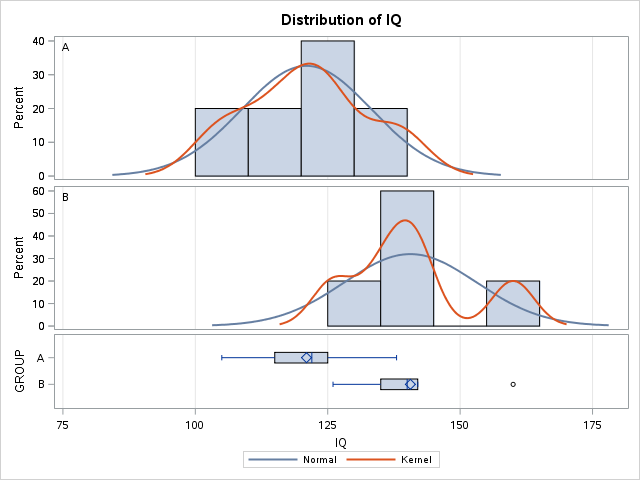
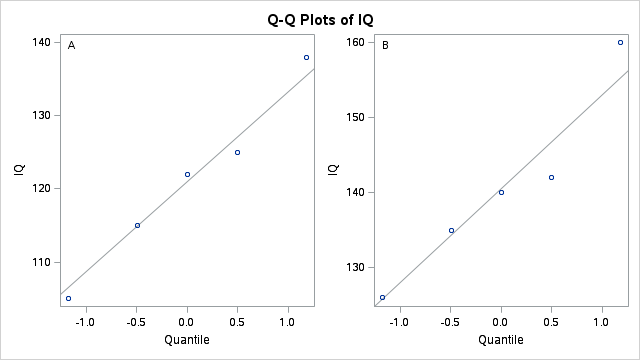
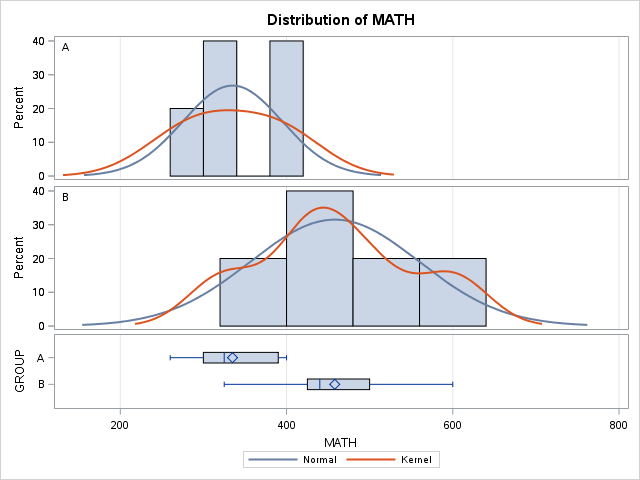
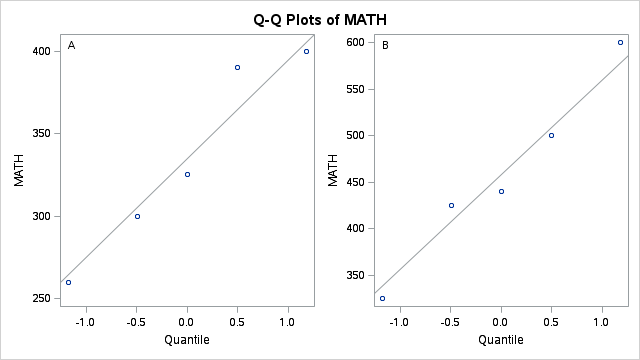

In [4]:
DATA COVAR;
LENGTH GROUP $ 1;
INPUT GROUP MATH IQ @@;
DATALINES;
A 260 105 A 325 115 A 300 122 A 400 125 A 390 138
B 325 126 B 440 135 B 425 142 B 500 140 B 600 160
;

PROC CORR DATA=COVAR NOSIMPLE;
TITLE 'COVARIATE EXAMPLE';
VAR MATH IQ;
RUN;

PROC TTEST DATA=COVAR;
CLASS GROUP;
VAR IQ MATH;
RUN;

Control for confounding
=================
IQ and math scores highly correlated (r=0.92456, p= 0.0001)  
significant diff.: IQ(P=.0365) AND MATH SCORES (P=0.0474)  


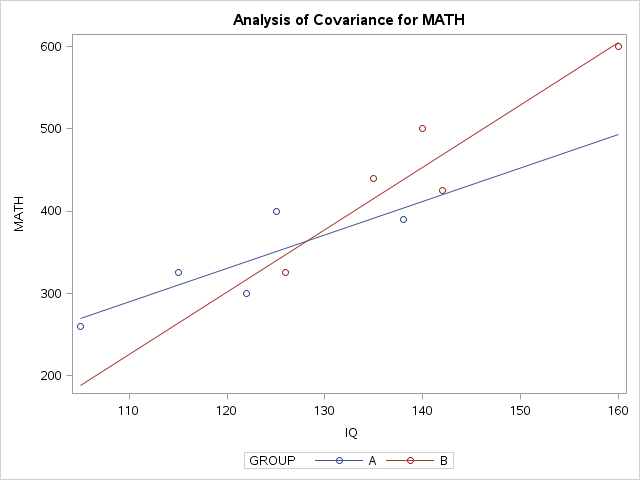

In [7]:
PROC GLM DATA=COVAR;
CLASS GROUP;
MODEL MATH=IQ GROUP IQ*GROUP;

RUN;

we expected no significant diff for group after we adjust for IQ  
======================================================================
IQ*GROUP interaction term has no significant difference  

we take out the interaction term, include IQ in the model for correction  
LSMEANS will adjust the math scores for two group  


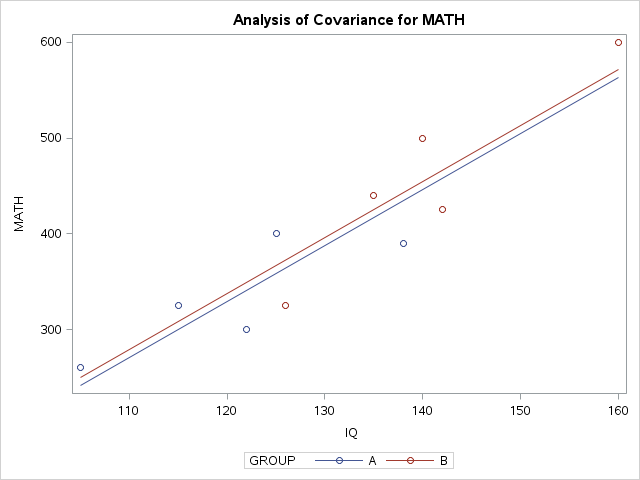
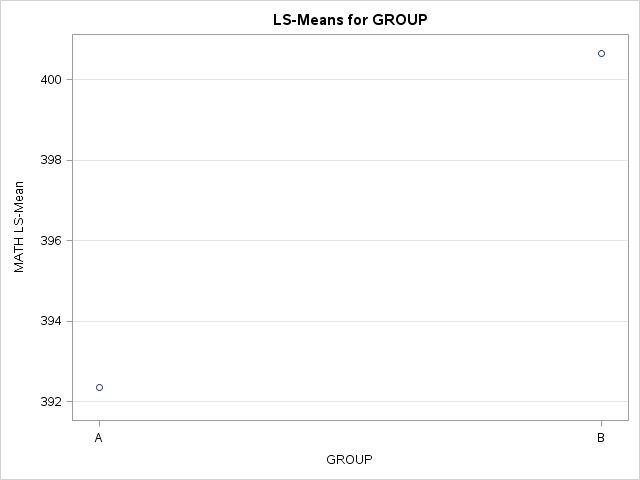

In [8]:
PROC GLM DATA=COVAR;
CLASS GROUP;
MODEL MATH=IQ GROUP;
LSMEANS GROUP;
RUN;